In [1]:
import pandas as pd
from plotnine import *
import numpy as np
import glob as glob
import os
# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', None)

In [10]:
cd data/

C:\Users\sriha\Desktop\Columbia\spring2022\datacomputationinnovation\incumbency-effect\data


In [14]:
pwd

'C:\\Users\\sriha\\Desktop\\Columbia\\spring2022\\datacomputationinnovation\\incumbency-effect\\data'

In [15]:
# path = r'C:\\Users\\sriha\\Desktop\\Columbia\\spring2022\\datacomputationinnovation\\incumbency-effect\\data' # use your path
all_files = glob.glob(("*.csv"))

# df = pd.concat((pd.read_csv(f) for f in all_files))

In [16]:
# def incumbency(file):
#     data=[]
#     df = pd.read_csv(file)
#     list_of_all_years=df.Year.unique()
#     list_of_assembly_elections=[]
#     for year in list_of_all_years:
#         tempdf=df[df['Year']==year]
#         if tempdf.Year.count() > 50:
#             list_of_assembly_elections.append(year)
#             try: 
#                 elections = tempdf
#                 elections['Incumbency_Value'] = np.where(elections['Incumbent'] == 'False', 0, elections['Incumbent'])
#                 elections['Winner'] = np.where(elections['Position'] == 1, 1,0)
#                 model = smf.logit("Winner ~ No_Terms + Recontest + N_Cand + Incumbent + ENOP", data=elections)
#                 results = model.fit()
#                 x = results.params
#                 y = results.pvalues
#                 coefs = {"coef_" + str(key): val for key, val in x.items()}
#                 pvalues =  {"p_" + str(key): val for key, val in x.items()}
#                 finaldict ={**coefs, **pvalues}
#                 finaldict['year'] =year
#                 finaldict['state'] = tempdf.State_Name.value_counts().index[0]
#                 data.append(finaldict)
#             except:
#                 pass
#     return data

In [17]:
data = []
for file in all_files:
        df = pd.read_csv(file)
        list_of_all_years=df.Year.unique()
        list_of_assembly_elections=[]
        for year in list_of_all_years:
            tempdf=df[df['Year']==year]
            if tempdf.Year.count() > 50:
                list_of_assembly_elections.append(year)
                try: 
                    elections = tempdf
                    elections['Incumbency_Value'] = np.where(elections['Incumbent'] == 'False', 0, elections['Incumbent'])
                    elections['Winner'] = np.where(elections['Position'] == 1, 1,0)
                    model = smf.logit("Winner ~ No_Terms + Recontest + N_Cand + Incumbent + ENOP", data=elections)
                    results = model.fit()
                    x = results.params
                    y = results.pvalues
                    coefs = {"coef_" + str(key): val for key, val in x.items()}
                    pvalues =  {"p_" + str(key): val for key, val in y.items()}
                    finaldict ={**coefs, **pvalues}
                    finaldict['year'] =year
                    finaldict['state'] = tempdf.State_Name.value_counts().index[0]
                    data.append(finaldict)
                except:
                    pass
                
dataframe = pd.DataFrame(data)

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

         Current function value: 0.101632
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.303178
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.370164
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.409740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.514635
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.474910
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.476300
         Iterations 6
         Current function value: 0.011562
         Iterations: 35
         Current function value: 0.011226
         Iterations: 35

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization fail


         Current function value: 0.046080
         Iterations: 35
         Current function value: 0.040337
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.164626
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.147164
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.101344
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.141249
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.260096
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.258406
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.231073
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.259399
         Iterations 7
Optimization terminated successfully.
         Curr

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,18,37,41,45,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: 

         Current function value: inf
         Iterations: 35
         Current function value: 0.010322
         Iterations: 35
         Current function value: 0.057494
         Iterations: 35
         Current function value: 0.041485
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.085349
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.126219
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.115601
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.091738
         Iterations 8
Optimization terminated successfully.

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591


         Current function value: 0.091969
         Iterations 8
         Current function value: 0.035868
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.175600
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.175700
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.143682
         Iterations 8
         Current function value: 0.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.160123
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339691
         Iterations 6
Optimization terminated successfully.

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591


         Current function value: 0.140859
         Iterations 8
         Current function value: inf
         Iterations: 35
         Current function value: 0.052066
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.081920
         Iterations 9


<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
<ipython-input-17-c341a8

         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.035008
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.035727
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.056795
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.063976
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.138772
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.140698
         Iterations 9
         Current function value: 0.061200
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.278260
         Iterations 7
Optimization terminated successfully.
         Current

<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591

Optimization terminated successfully.
         Current function value: 0.251347
         Iterations 7
         Current function value: 0.049584
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.099360
         Iterations 10
Optimization terminated successfully.

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_


         Current function value: 0.116320
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.119661
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.133371
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.126058
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.217686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308946
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.220345
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177252
         Iterations 8
Optimization terminated successfully.

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



         Current function value: 0.189470
         Iterations 8
         Current function value: 0.000000
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in ex


         Current function value: 0.072878
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086849
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.102294
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.077869
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.082940
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.188076
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.144295
         Iterations 8
         Current function value: 0.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.156716
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.153996
         Iterations 8
Optimization terminated successfully.
         Curre

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591

         Current function value: inf
         Iterations: 35
         Current function value: 0.034491
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.107763
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.256548
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.170535
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.225614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276083
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344312
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.271478
         Iterations 7
Optimization terminated successfully.
         Current f

<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591

         Current function value: 0.045209
         Iterations: 35
         Current function value: 0.070628
         Iterations: 35
         Current function value: 0.060033
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.112308
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.127963
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.177922
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.128786
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.120858
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203589
         Iterations 7

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_


         Current function value: 0.002334
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.048515
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.046845
         Iterations 11


c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



         Current function value: 0.005485
         Iterations: 35
         Current function value: 0.003676
         Iterations: 35
         Current function value: 0.054127
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.099712
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.153765
         Iterations 8
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.273101
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.243521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200764
         Iterations 7
         Current function value: 0.139040
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.138545
         Iterations 8
Op

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization fail

Optimization terminated successfully.
         Current function value: 0.302784
         Iterations 7
         Current function value: 0.022886
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.098197
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.172852
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.110533
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.224202
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.121699
         Iterations 8
Optimization terminated successfully.

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8


         Current function value: 0.188658
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.154981
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.262431
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271936
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.168844
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.163649
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.370108
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.152669
         Iterations 8


c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,18,37,41,45,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWar

         Current function value: 0.004912
         Iterations: 35
         Current function value: 0.047895
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.074943
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071104
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.091890
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.102787
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.144501
         Iterations 8
Optimization terminated successfully.

<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591


         Current function value: 0.182239
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.161186
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.131381
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.153473
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.149351
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269711
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.254948
         Iterations 7


c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,18,37,41,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

         Current function value: 0.008964
         Iterations: 35
         Current function value: 0.021702
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.058723
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.099364
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.095701
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.082674
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.108608
         Iterations 8
         Current function value: 0.021328
         Iterations: 35
Optimization terminated successfully.

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_


         Current function value: 0.218648
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.183017
         Iterations 7
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.161704
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.154163
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.169336
         Iterations 8
         Current function value: 0.013744
         Iterations: 35
         Current function value: 0.051301
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.115388
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.257352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322581
         Iterations 7
Optimization terminated succ

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization fail

         Current function value: 0.111177
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.258411
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.313545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303937
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357817
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.359902
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.333631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.328609
         Iterations 7
         Current function value: 0.074048
         Iterations: 35


c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Optimization terminated successfully.
         Current function value: 0.191091
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.357434
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.227281
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287175
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301121
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379988
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381053
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.393812
         Iterations 6


c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8

         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.105647
         Iterations 23
Optimization terminated successfully.
         Current function value: 0.348277
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.360385
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.332085
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.593594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.477024
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629362
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.450032
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.476809
         Iterations 6
Optimization termina

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
c:\users\sriha\appdata\l

         Current function value: 0.022645
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: 0.011790
         Iterations: 35
         Current function value: 0.121537
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.212173
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.263264
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.256109
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.172722
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.326209
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242001
         Iterations 7
Optimization terminated suc

<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local

Optimization terminated successfully.
         Current function value: 0.224670
         Iterations 7
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.247426
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.269132
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300548
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.149836
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.286067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.217431
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.271111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.232780
         Iterations 7
Optimization terminat

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591


         Current function value: 0.256230
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.216149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.193639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.113335
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077293
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.116750
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.146128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.174532
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.145862
         Iterations 9


<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591

Optimization terminated successfully.
         Current function value: 0.253412
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.173740
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.175053
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.150695
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201896
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242263
         Iterations 7


<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

         Current function value: 0.402285
         Iterations: 35
         Current function value: 0.056715
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.112533
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.166404
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.152428
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.119872
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.154024
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.226353
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.265055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.194401
         Iterations 7
Optimization terminated successfully.
         Curre

<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591


         Current function value: 0.151896
         Iterations 8
         Current function value: inf
         Iterations: 35
         Current function value: 0.053750
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.107386
         Iterations 27
Optimization terminated successfully.
         Current function value: 0.427288
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.421998
         Iterations 6
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.371843
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310652
         Iterations 7


c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (18,41,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Optimization terminated successfully.
         Current function value: 0.047741
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.090287
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.089394
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.119057
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.080138
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.150241
         Iterations 8
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.094709
         Iterations 9
         Current function value: 0.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.141516
         Iterations 8
Optimization terminated successfully.
         Current 

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591

Optimization terminated successfully.
         Current function value: 0.200568
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.059947
         Iterations 10
         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.044787
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.120344
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.175454
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.131932
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.258760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270991
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.262551
         Iterations 7
Optimization terminated successfully.
         Curr

<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591

Optimization terminated successfully.
         Current function value: 0.363216
         Iterations 7
         Current function value: inf
         Iterations: 35
         Current function value: 0.038973
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.119518
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.151937
         Iterations 8


c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,18,37,41,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

         Current function value: 0.002592
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.067656
         Iterations 12
         Current function value: 0.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.049715
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.119866
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.089753
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.099252
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.118997
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.109538
         Iterations 8
Optimization terminated successfully.

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591


         Current function value: 0.102702
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.173804
         Iterations 8
         Current function value: inf
         Iterations: 35
         Current function value: 0.024629
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.160541
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.111604
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.125886
         Iterations 9
         Current function value: 0.109906
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.161411
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.139533
         Iterations 8
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591


         Current function value: 0.178180
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.149044
         Iterations 8


c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (18,37,41,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Max

         Current function value: 0.000000
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.089049
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.331159
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.155932
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.245648
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.219609
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.131857
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.193721
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.247356
         Iterations 8
Optimization terminated successfully.
         Current f

<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a8259183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-c341a82591

In [18]:
newdf=dataframe[dataframe['p_Incumbent[T.True]'] < 0.05]

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


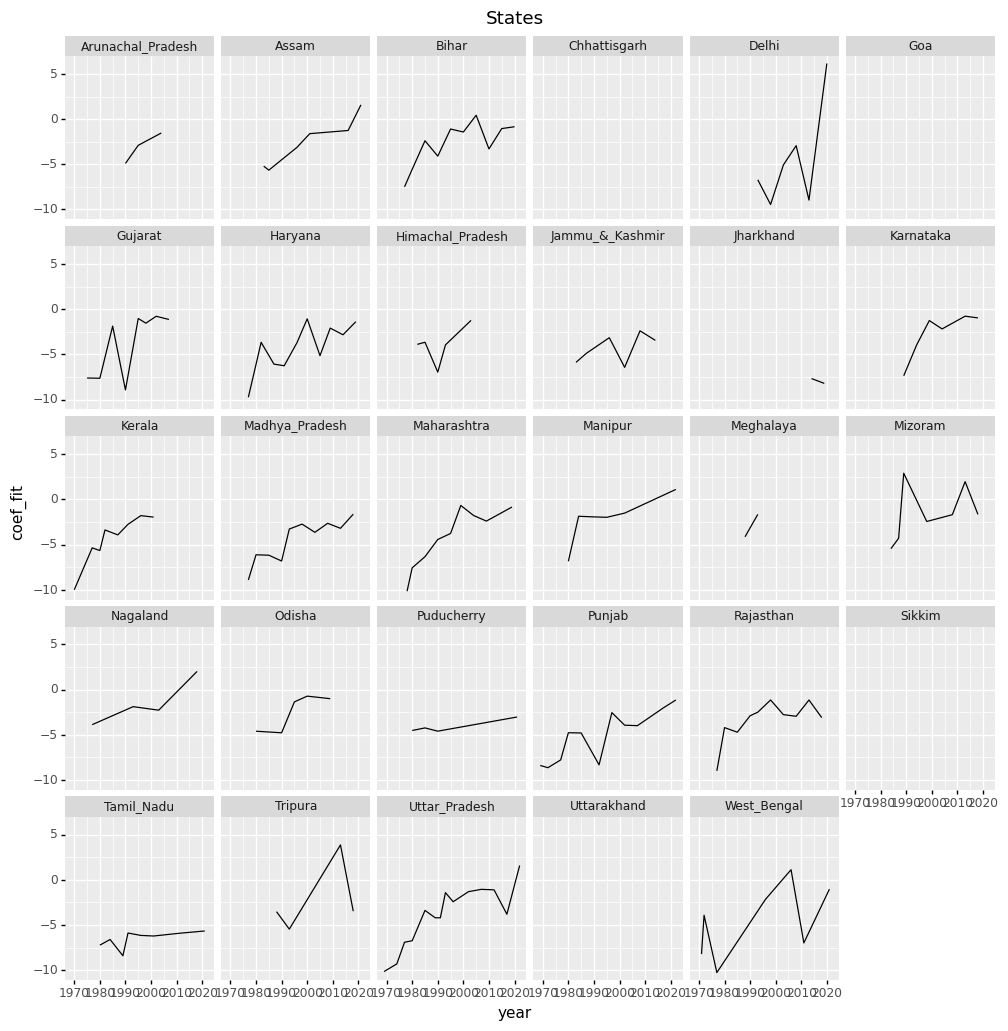

<ggplot: (159541975053)>

In [19]:
display(
    ggplot(newdf,                   # data
        aes('year', 'coef_Incumbent[T.True]'))          # aesthetics
        + geom_line()               # geometry
        + facet_wrap('state')
        + theme(figure_size=(12, 12 ))
        + labs(
            title = "States",
            y = "coef_fit",
            x = "year"
        )
)   


In [94]:
all_the_data=[]
for file in all_files:
        df = pd.read_csv(file)
        list_of_all_years=df.Year.unique()
        for year in list_of_all_years:
            each_row={}
            tempdf=df[df['Year']==year]
            each_row['year'] = year
            each_row['state'] = tempdf['State_Name'].unique()[0]
            each_row['no_constituencies'] = len(tempdf['Constituency_Name'].unique())
            each_row['no_candidates'] = len(tempdf['pid'].unique())
            incumbentdf=tempdf[tempdf['Incumbent']==True]
            each_row['no_incumbents_participating'] = len(incumbentdf)
            each_row['no_incumbents_winning'] = len(incumbentdf[incumbentdf['Position']==1])
            all_the_data.append(each_row)

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,18,37,41,45,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,18,37,41,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (18,41,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interact

In [95]:
incumbentdf= pd.DataFrame(all_the_data)

In [104]:
incumbentdf['percentage_winner'] = round(incumbentdf['no_incumbents_winning']*100/incumbentdf['no_constituencies'],1)

In [105]:
incumbentdf.head()

,year,state,no_constituencies,no_candidates,no_incumbents_participating,no_incumbents_winning,percentage_winner
0,1978,Arunachal_Pradesh,29,85,0,0,0.0
1,1980,Arunachal_Pradesh,30,95,24,11,36.7
2,1984,Arunachal_Pradesh,30,115,22,15,50.0
3,1990,Arunachal_Pradesh,60,168,26,16,26.7
4,1995,Arunachal_Pradesh,60,173,54,27,45.0


In [106]:
chosendf= incumbentdf[incumbentdf['no_constituencies'] > 50]

In [107]:
chosendf.head()

,year,state,no_constituencies,no_candidates,no_incumbents_participating,no_incumbents_winning,percentage_winner
3,1990,Arunachal_Pradesh,60,168,26,16,26.7
4,1995,Arunachal_Pradesh,60,173,54,27,45.0
6,1999,Arunachal_Pradesh,59,170,53,31,52.5
9,2004,Arunachal_Pradesh,57,164,53,24,42.1
11,2009,Arunachal_Pradesh,60,157,53,32,53.3


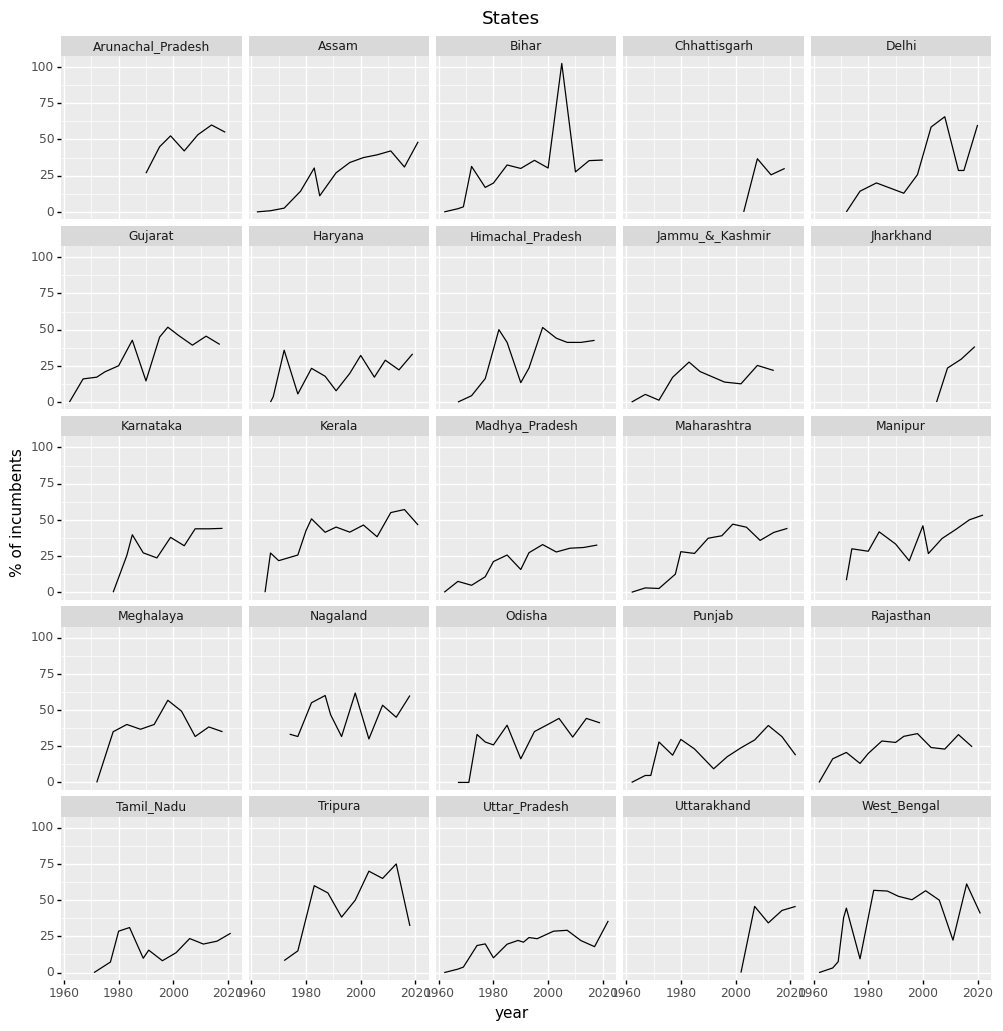

<ggplot: (159544397153)>

In [108]:
display(
    ggplot(chosendf,                   # data
        aes('year', 'percentage_winner'))          # aesthetics
        + geom_line()               # geometry
        + facet_wrap('state')
        + theme(figure_size=(12, 12 ))
        + labs(
            title = "States",
            y = "% of incumbents",
            x = "year"
        )
)   
